In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

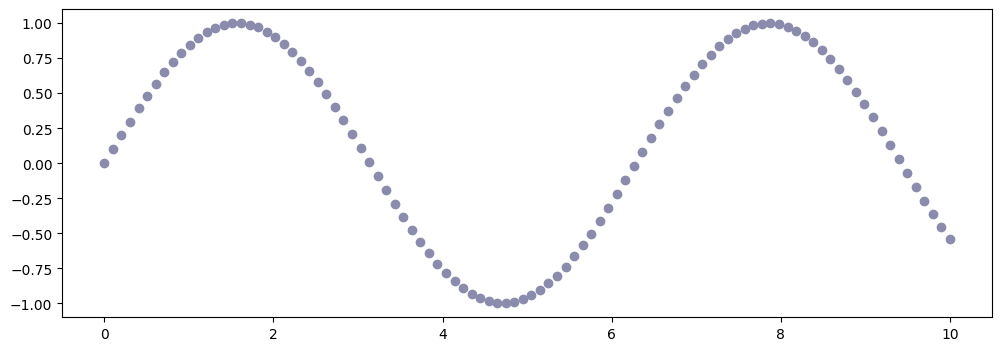

In [56]:
# generate time series
m = 100
x = np.linspace(0, 10, m)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, marker="o", ls="none", c="#8B8BAE");

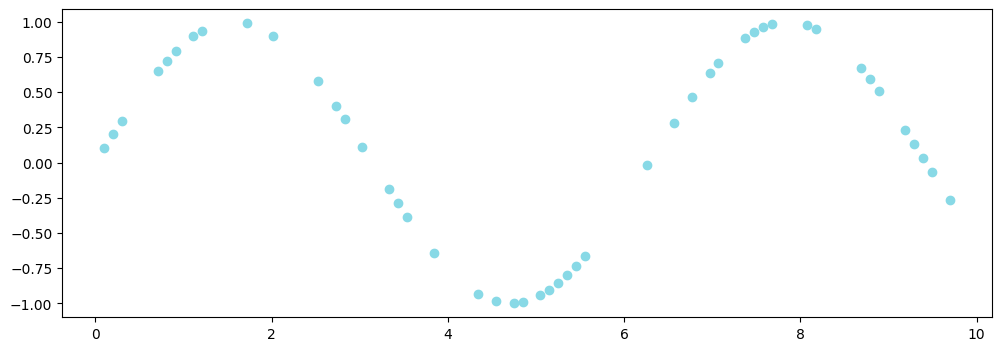

In [55]:
# create gaps
np.random.seed(42)

mask = np.random.rand(m) > 0.5  # keep about 50% of original data
x_gap = x[mask]
y_gap = y[mask]

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_gap, y_gap, marker="o", ls="none", c="#88D9E6");

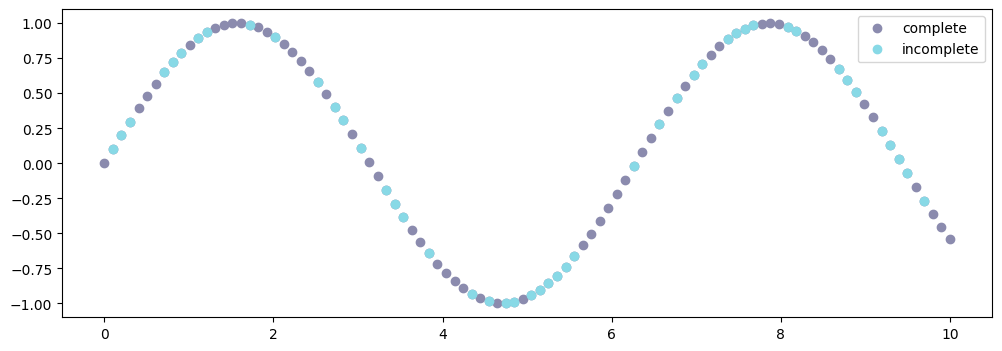

In [54]:
# compare series
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, marker="o", ls="none", c="#8B8BAE", label="complete");
ax.plot(x_gap, y_gap, marker="o", ls="none", c="#88D9E6", label="incomplete");
ax.legend();

In [36]:
x_gap.shape

(47,)

# Date range in pandas

`date_range()` returns a fixed frequency `DatetimeIndex`.

In [2]:
import pandas as pd

# format: YYYY-MM-DD, daily frequency
pd.date_range(start="2022-01-01", end="2022-01-31", freq="D")

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')

In [20]:
# format: YYYY-MM-DD, also daily frequency
pd.date_range("2022-01-01", "2022-01-31")

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# format: MM/DD/YYYY, also daily frequency
pd.date_range("01/01/2018", "01/31/2018")

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31'],
              dtype='datetime64[ns]', freq='D')

I could not find documentation about the format of the start and end dates, but I found that `YYYY-MM-DD` and `MM/DD/YYYY` are valid formats. The format `YYYY-MM-DD` is used in these examples:

- [Example of YYYY-MM-DD](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)

We can create a dataframe

In [3]:
data = {
    "datetime": pd.date_range(start="2022-01-01", end="2022-01-10", freq="D")
}

df0 = pd.DataFrame(data, columns=["datetime"])
df0

datetime
0 2022-01-01
1 2022-01-02
2 2022-01-03
3 2022-01-04
4 2022-01-05
5 2022-01-06
6 2022-01-07
7 2022-01-08
8 2022-01-09
9 2022-01-10

In [ ]:
df = df0.copy()
df["datetime"] = pd.to_d

In [31]:
df = df0.copy()
df.index = df["datetime"]

In [32]:
df

datetime
datetime             
2022-01-01 2022-01-01
2022-01-02 2022-01-02
2022-01-03 2022-01-03
2022-01-04 2022-01-04
2022-01-05 2022-01-05
2022-01-06 2022-01-06
2022-01-07 2022-01-07
2022-01-08 2022-01-08
2022-01-09 2022-01-09
2022-01-10 2022-01-10

In [5]:
# https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe?utm_source=pocket_mylist
import pandas as pd

idx = pd.date_range('09-01-2013', '09-30-2013')

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
print(s[:10])

2013-09-01     0
2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
2013-09-08     0
2013-09-09     0
2013-09-10     0
Freq: D, dtype: int64


In [ ]:
data = {
    
}

In [6]:
import pandas

s = pd.date_range("01/01/2018", "01/31/2018")
s

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31'],
              dtype='datetime64[ns]', freq='D')

In [7]:
s.year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64')

In [8]:
s.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64')

In [9]:
s.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [10]:
s.hour

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64')

In [11]:
s.minute

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64')

In [12]:
s.second

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64')

In [ ]:
data = {
    "datetime" = pd.date_range(start="")
}

# Using datetime as index

Suppose you have this dataframe, where each day contains a measurement.
Your aim is to use the `datetime` column as index.

In [2]:
import numpy as np
import pandas as pd

data = {
    "datetime": pd.date_range(start="2022-01-01", end="2022-01-10", freq="D"),
    "value": np.arange(1, 11),
}

df = pd.DataFrame(data)
df

datetime  value
0 2022-01-01      1
1 2022-01-02      2
2 2022-01-03      3
3 2022-01-04      4
4 2022-01-05      5
5 2022-01-06      6
6 2022-01-07      7
7 2022-01-08      8
8 2022-01-09      9
9 2022-01-10     10

In [17]:
# Current index
df.index

RangeIndex(start=0, stop=10, step=1)

The following blocks show how to change the index of the dataframe:

In [34]:
# Approach 1
# https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html?highlight=datetime%20like
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index
df0 = df.copy()
df0 = df0.set_index("datetime")  # you can also use inplace=True to avoid creating a new copy
df0.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [35]:
# Approach 2
# https://walkenho.github.io/interpolating-time-series-p1-pandas/
df0 = df.copy()
df0.index = df0["datetime"]
df0.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [32]:
# Approach 2
# https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html?highlight=datetime%20like
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index
df0 = df.copy()
df0 = df0.set_index("datetime")  # you can also use inplace=True to avoid creating a new copy
df0.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', name='datetime', freq=None)

Result:

In [33]:
df0

value
datetime         
2022-01-01      1
2022-01-02      2
2022-01-03      3
2022-01-04      4
2022-01-05      5
2022-01-06      6
2022-01-07      7
2022-01-08      8
2022-01-09      9
2022-01-10     10

See [How to handle time series data with ease?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html), section `Datetime as index`, to know more about this topic. From that article:

> Working with a datetime index (i.e. `DatetimeIndex`) provides powerful functionalities. For example, we do not need the `dt` accessor to get the time series properties, but have these properties available on the index directly.

> Some other advantages are the convenient subsetting of time period or the adapted time scale on plots.

In [3]:
# Advantage 1: do not use dt for accessing datetime properties
df0 = df.copy()
df0 = df0.set_index("datetime")

df0.index.year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022], dtype='int64', name='datetime')

In [4]:
# Advantage 2: subsets based on datetimes
df0["2022-01-01":"2022-01-05"]

value
datetime         
2022-01-01      1
2022-01-02      2
2022-01-03      3
2022-01-04      4
2022-01-05      5

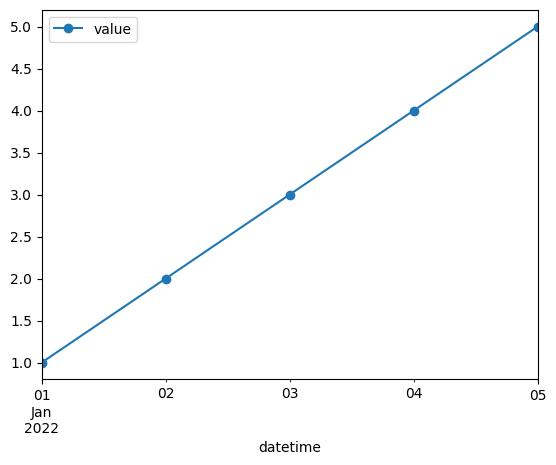

In [5]:
df0["2022-01-01":"2022-01-05"].plot(marker="o");

In [6]:
# .. but you cannot do this
df0["2022-01-01"]

KeyError: '2022-01-01'

In [7]:
# ... nor this
df0[pd.Timestamp("2022-01-01")]

KeyError: Timestamp('2022-01-01 00:00:00')

In [53]:
# even when the exact timestamp is there
df0.index[0]

Timestamp('2022-01-01 00:00:00')

In [11]:
df0.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [24]:
# Instead, you must use .loc
df0.loc["2022-01-01"]

value    1
Name: 2022-01-01 00:00:00, dtype: int64

# Ignore

In [ ]:
CONTINA REVISANDO COMO ACCEDER A UN ROW CUANDO EL INDEX ES DATETIME

In [8]:
import pandas as pd
earliest = pd.Timestamp('2012-01-01 06:00:00')
latest = pd.Timestamp('2014-12-01 23:00:00')
dr = pd.date_range (start=earliest, end=latest,freq="30min" )
df_freq = pd.DataFrame(index=dr, columns=['freq'])
df_freq = df_freq.fillna(0)

In [10]:
df_freq.index

DatetimeIndex(['2012-01-01 06:00:00', '2012-01-01 06:30:00',
               '2012-01-01 07:00:00', '2012-01-01 07:30:00',
               '2012-01-01 08:00:00', '2012-01-01 08:30:00',
               '2012-01-01 09:00:00', '2012-01-01 09:30:00',
               '2012-01-01 10:00:00', '2012-01-01 10:30:00',
               ...
               '2014-12-01 18:30:00', '2014-12-01 19:00:00',
               '2014-12-01 19:30:00', '2014-12-01 20:00:00',
               '2014-12-01 20:30:00', '2014-12-01 21:00:00',
               '2014-12-01 21:30:00', '2014-12-01 22:00:00',
               '2014-12-01 22:30:00', '2014-12-01 23:00:00'],
              dtype='datetime64[ns]', length=51155, freq='30T')

In [9]:
df_freq['2012-03-04']

/tmp/ipykernel_5111/3201651216.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_freq['2012-03-04']


freq
2012-03-04 00:00:00     0
2012-03-04 00:30:00     0
2012-03-04 01:00:00     0
2012-03-04 01:30:00     0
2012-03-04 02:00:00     0
2012-03-04 02:30:00     0
2012-03-04 03:00:00     0
2012-03-04 03:30:00     0
2012-03-04 04:00:00     0
2012-03-04 04:30:00     0
2012-03-04 05:00:00     0
2012-03-04 05:30:00     0
2012-03-04 06:00:00     0
2012-03-04 06:30:00     0
2012-03-04 07:00:00     0
2012-03-04 07:30:00     0
2012-03-04 08:00:00     0
2012-03-04 08:30:00     0
2012-03-04 09:00:00     0
2012-03-04 09:30:00     0
2012-03-04 10:00:00     0
2012-03-04 10:30:00     0
2012-03-04 11:00:00     0
2012-03-04 11:30:00     0
2012-03-04 12:00:00     0
2012-03-04 12:30:00     0
2012-03-04 13:00:00     0
2012-03-04 13:30:00     0
2012-03-04 14:00:00     0
2012-03-04 14:30:00     0
2012-03-04 15:00:00     0
2012-03-04 15:30:00     0
2012-03-04 16:00:00     0
2012-03-04 16:30:00     0
2012-03-04 17:00:00     0
2012-03-04 17:30:00     0
2012-03-04 18:00:00     0
2012-03-04 18:30:00     0
2012-03-04 19:00:00     0
2012-03-04 19:30:00     0
2012-03-04 20:00:00     0
2012-03-04 20:30:00     0
2012-03-04 21:00:00     0
2012-03-04 21:30:00     0
2012-03-04 22:00:00     0
2012-03-04 22:30:00     0
2012-03-04 23:00:00     0
2012-03-04 23:30:00     0

In [13]:
import numpy as np
import pandas as pd

data = {
    #"datetime": pd.date_range(start="2022-01-01", end="2022-01-10", freq="D"),
    "value": np.arange(1, 11),
}

df = pd.DataFrame(data, index=pd.date_range(start="2022-01-01", end="2022-01-10", freq="D"))
df

value
2022-01-01      1
2022-01-02      2
2022-01-03      3
2022-01-04      4
2022-01-05      5
2022-01-06      6
2022-01-07      7
2022-01-08      8
2022-01-09      9
2022-01-10     10

In [14]:
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df["2022-01-01"]

KeyError: '2022-01-01'

In [16]:
import pandas as pd
earliest = pd.Timestamp('2012-01-01')
latest = pd.Timestamp('2014-12-01')
dr = pd.date_range (start=earliest, end=latest, freq="D")
df_freq = pd.DataFrame(index=dr, columns=['freq'])
df_freq = df_freq.fillna(0)

In [17]:
df_freq

freq
2012-01-01     0
2012-01-02     0
2012-01-03     0
2012-01-04     0
2012-01-05     0
...          ...
2014-11-27     0
2014-11-28     0
2014-11-29     0
2014-11-30     0
2014-12-01     0

[1066 rows x 1 columns]

In [20]:
df_freq["2012-01-02"]

KeyError: '2012-01-02'

/tmp/ipykernel_5111/2091830219.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_freq['2012-03-04']


freq
2012-03-04 00:00:00     0
2012-03-04 00:30:00     0
2012-03-04 01:00:00     0
2012-03-04 01:30:00     0
2012-03-04 02:00:00     0
2012-03-04 02:30:00     0
2012-03-04 03:00:00     0
2012-03-04 03:30:00     0
2012-03-04 04:00:00     0
2012-03-04 04:30:00     0
2012-03-04 05:00:00     0
2012-03-04 05:30:00     0
2012-03-04 06:00:00     0
2012-03-04 06:30:00     0
2012-03-04 07:00:00     0
2012-03-04 07:30:00     0
2012-03-04 08:00:00     0
2012-03-04 08:30:00     0
2012-03-04 09:00:00     0
2012-03-04 09:30:00     0
2012-03-04 10:00:00     0
2012-03-04 10:30:00     0
2012-03-04 11:00:00     0
2012-03-04 11:30:00     0
2012-03-04 12:00:00     0
2012-03-04 12:30:00     0
2012-03-04 13:00:00     0
2012-03-04 13:30:00     0
2012-03-04 14:00:00     0
2012-03-04 14:30:00     0
2012-03-04 15:00:00     0
2012-03-04 15:30:00     0
2012-03-04 16:00:00     0
2012-03-04 16:30:00     0
2012-03-04 17:00:00     0
2012-03-04 17:30:00     0
2012-03-04 18:00:00     0
2012-03-04 18:30:00     0
2012-03-04 19:00:00     0
2012-03-04 19:30:00     0
2012-03-04 20:00:00     0
2012-03-04 20:30:00     0
2012-03-04 21:00:00     0
2012-03-04 21:30:00     0
2012-03-04 22:00:00     0
2012-03-04 22:30:00     0
2012-03-04 23:00:00     0
2012-03-04 23:30:00     0

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index

# revisar reindex, reset_index

In [30]:
# This does not work, you need more columns
# See example
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html#pandas.pivot
df.pivot(index="datetime", columns=["value"])

Empty DataFrame
Columns: []
Index: [2022-01-01 00:00:00, 2022-01-02 00:00:00, 2022-01-03 00:00:00, 2022-01-04 00:00:00, 2022-01-05 00:00:00, 2022-01-06 00:00:00, 2022-01-07 00:00:00, 2022-01-08 00:00:00, 2022-01-09 00:00:00, 2022-01-10 00:00:00]

# Selecting ranges (creating masks) for datetimes

# References

- [How to handle time series data with ease?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html)

- [How to create a data range in pandas (3 examples)](https://www.statology.org/pandas-date-range/)